In [0]:
%python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
cell_phones_df = spark.sql("SELECT country, Year, cell_phones FROM cell_phones_final_csv").toPandas()
population_df = spark.sql("SELECT country, Year, pop FROM pop_final_csv").toPandas()

In [0]:
%python
cell_phones_df.head()

,country,Year,cell_phones
0,country,NaN,NaN
1,Finland,1980.0,23500.0
2,Finland,1981.0,28300.0
3,Japan,1981.0,13300.0
4,Norway,1981.0,1670.0


In [0]:
%python
population_df.head()

,country,Year,pop
0,country,NaN,NaN
1,Afghanistan,1800.0,3280000.0
2,Angola,1800.0,1570000.0
3,Albania,1800.0,400000.0
4,Andorra,1800.0,2650.0


In [0]:
%python
merged_df = pd.merge(cell_phones_df, population_df, on=['Year', 'country'])
merged_df.head()

,country,Year,cell_phones,pop
0,country,NaN,NaN,NaN
1,Finland,1980.0,23500.0,4780000.0
2,Finland,1981.0,28300.0,4800000.0
3,Japan,1981.0,13300.0,119000000.0
4,Norway,1981.0,1670.0,4100000.0


In [0]:
%python
merged_df['cell_phones_per_person'] = merged_df['cell_phones'] / merged_df['pop']
merged_df.head()

,country,Year,cell_phones,pop,cell_phones_per_person
0,country,NaN,NaN,NaN,NaN
1,Finland,1980.0,23500.0,4780000.0,0.004916
2,Finland,1981.0,28300.0,4800000.0,0.005896
3,Japan,1981.0,13300.0,119000000.0,0.000112
4,Norway,1981.0,1670.0,4100000.0,0.000407


In [0]:
%python
global_trend = merged_df.groupby('Year')['cell_phones_per_person'].mean().reset_index()
global_trend.head()

,Year,cell_phones_per_person
0,1980.0,0.004916
1,1981.0,0.002217
2,1982.0,0.002758
3,1983.0,0.004163
4,1984.0,0.004188


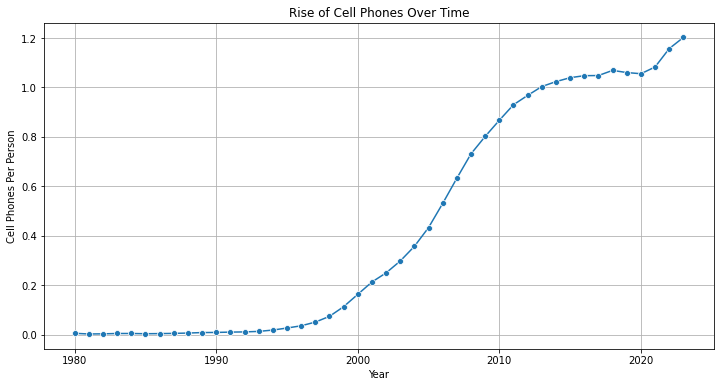

In [0]:
%python
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trend, x='Year', y='cell_phones_per_person', marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Cell Phones Per Person")
plt.title("Rise of Cell Phones Over Time")
plt.grid(True)
plt.show()